<a href="https://colab.research.google.com/github/tatianaportsova/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [6]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-22 03:42:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-01-22 03:42:32 (592 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [7]:
import pandas as pd

column_headers = ['party', 'hadicapped-infants', 'water-project', 'budget',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
                  'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                  'immigration', 'synfuels', 'education', 'right-to-sue',
                  'crime', 'duty-free', 'south-africa']

df = pd.read_csv('house-votes-84.data', header = None, names = column_headers,
                 na_values = '?')

print(df.shape)
df.head()

(435, 17)


,party,hadicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [8]:
df = df.replace({'y':1, 'n':0})
df.head(3)

,party,hadicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [10]:
df.describe()

,hadicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [53]:
df_immigration = df.drop(['hadicapped-infants', 'water-project', 'budget',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
                  'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                  'synfuels', 'education', 'right-to-sue',
                  'crime', 'duty-free', 'south-africa'], 
                                                axis=1)

df_immigration.head()

,party,immigration
0,republican,1.0
1,republican,0.0
2,democrat,0.0
3,democrat,0.0
4,democrat,0.0


In [55]:
df_immigration = df_immigration.dropna()
df_immigration.isnull().sum()

party          0
immigration    0
dtype: int64

In [0]:
def confidence_interval(data, confidence_level=.95):
  sample = np.array(data)

  # sample mean
  x_bar = np.mean(sample)
  # **SAMPLE** standard deviation
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic 
  t = stats.t.ppf((1+confidence_level) / 2, n-1)

  # print(s)
  print("Sample Size", n)
  
  # print(t)
  standard_error = s/np.sqrt(n)
  margin_of_error = t*standard_error

  upper_bound = x_bar + margin_of_error
  lower_bound = x_bar - margin_of_error

  return (lower_bound, x_bar, upper_bound)

In [72]:
# Confidence Interval
immigration_CI = confidence_interval(df_immigration['immigration'])

immigration_CI

Sample Size 428


(0.45711551746571655, 0.5046728971962616, 0.5522302769268067)

I am 95% confident that about **45% to 55%** of the voters support the Immigration bill(regardles of whether they're democrats or republicans). However, the sample isn't random and it's good to keep in mind that the sample size is only 428.

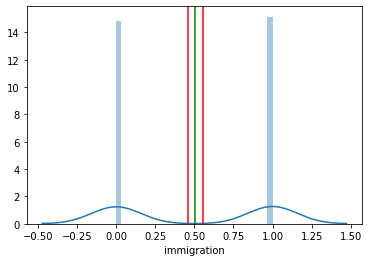

In [62]:
# Histogram
ax = sns.distplot(df_immigration['immigration'], bins=30)

# verical lines
plt.axvline(x=immigration_CI[0], color='red')
plt.axvline(x=immigration_CI[1], color='green')
plt.axvline(x=immigration_CI[2], color='red');

## Chi-squared tests:
Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

  

𝐻0 : The two variables are independent

𝐻𝑎 : The two variables are dependent (related, correlated, associated)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')


In [88]:
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [90]:
small_df = small_df.nlargest(3, ['TotalSquareFootage']) 
small_df

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
1298,6110,4692,950,160000,11752
523,3138,3138,1538,184750,7814
1182,2396,2411,2065,745000,6872


In [95]:
contingency_table = np.array([[6110, 4692, 950],
                              [3138, 3138, 1538],
                              [2396, 2411, 2065]])

chi_2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi^2 Statistic", chi_2_stat)
print("p value", p_value)
print("Degrees of Freedom", dof)
print("Expected Value Table", expected)


Chi^2 Statistic 1612.6935840350097
p value 0.0
Degrees of Freedom 4
Expected Value Table [[5175.89409184 4552.24419396 2023.8617142 ]
 [3441.49391028 3026.82404115 1345.68204857]
 [3026.61199788 2661.93176488 1183.45623723]]


Based on a chi^2 statistic of 1612.693 and a p-value of 0.0, I **fail to reject** the null hypothesis that index variables and Square Footage data are independent.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

In [0]:
def confidence_interval(data, confidence_level=.95):
  sample = np.array(data, maskna=True)

# NumPy by default calculates the *POPULATION* standard deviation 
# (using n degrees of freedom)

  # sample mean
  x_bar = np.mean(sample)
  # **SAMPLE** standard deviation
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic corresponding to DOF and Confidence Level
  # What is the t-statistic for this specific t-distribution that we're working with
  # The t-distribution that we're working with defined by the Degrees of Freedom
  # Return to me the t-statistic that contains the provided probability above the given cutoff
  t = stats.t.ppf((1+confidence_level) / 2, n-1)

  # print(s)
  print("Sample Size", n)
  # print(t)

  standard_error = s/np.sqrt(n)
  margin_of_error = t*standard_error

  upper_bound = x_bar + margin_of_error
  lower_bound = x_bar - margin_of_error

  return (lower_bound, x_bar, upper_bound)

In [0]:
immigration_CI = confidence_interval(df['immigration'])

immigration_CI